# Automated Customer Profiling & RFM Clustering

---

## Project Overview

In a highly competitive business landscape, understanding customer differences is key to building lasting relationships and driving growth. Customer segmentation enables companies to **tailor their marketing strategies, optimize pricing, and improve retention** by delivering more relevant and personalized experiences.  
The goal of this analysis is to:
- **Identify customer segments** based on behavioral patterns, demographics, and service usage
- Interpret how **these segments differ in spending habits, engagement levels, loyalty, and churn risk**
- **Translate data-driven segments into actionable business strategies** that drive revenue growth and customer loyalty

This project prioritizes interpretability and decision support over model complexity.

### Dataset
Mall Customer Segmentation Dataset

### Tools
Python, pandas, scikit-learn, matplotlib, seaborn

## Imports and Dataset Loading

---

This section sets up the Python environment and loads the retail sales dataset into memory.
The required libraries are imported, and the dataset is fetched directly from its public source to ensure reproducibility.

In [7]:
# =========================
# Import Libraries
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Optional: hide sklearn user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# =========================
# Load Dataset (and view the first few rows)
# =========================

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dataset Overview

---

The dataset contains **customer-level attributes related to spending behavior
and engagement**. Each row represents a single customer, allowing segmentation
based on observable behavioral patterns.

## Initial Data Inspection

---

Before segmentation, **the data is reviewed** to understand its structure,
ranges, and potential quality issues that may affect clustering results.

In [8]:
# =========================
# Initial Data Inspection
# =========================

# Check data types and missing values
df.info()

# Summary statistics for numeric columns
df.describe()

# Confirm there are no missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploring Customer Behavior Patterns

---

This section examines how customers differ in terms of spending and engagement.
The goal is to develop intuition about natural groupings before applying
any clustering technique.

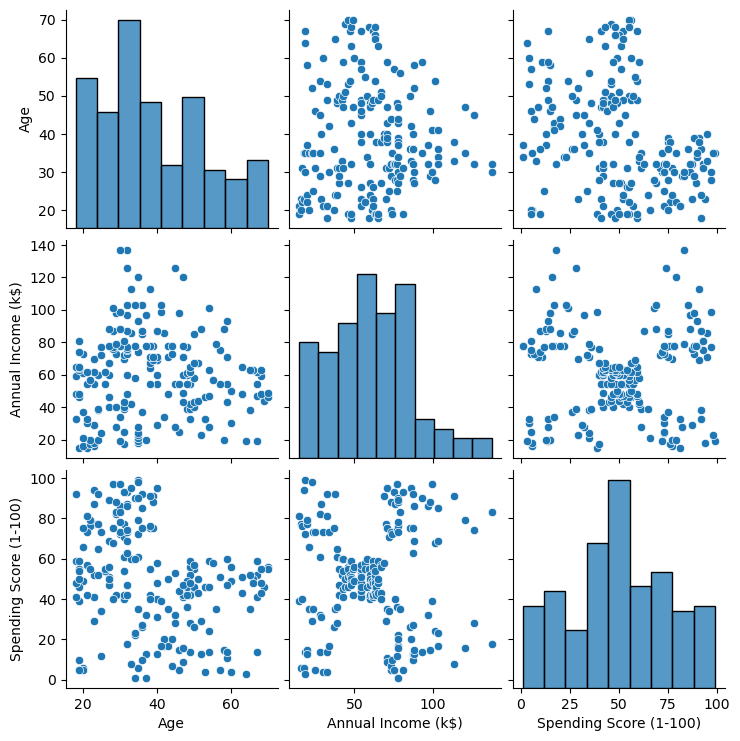

In [9]:
# =========================
# Exploratory Data Analysis
# =========================

# Pairplot to visualize distributions and relationships
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

## Key Insights from Exploratory Analysis

While age shows a general trend, **the Income-to-Spending ratio is our primary driver for segmentation**. Specifically, a high-value 'Target' group (High Income/High Spend) and a 'High-Potential' group (Low Income/High Spend) that likely represents a younger or more trend-driven demographic are present. The strategy should move away from broad age-based marketing and toward these five behavioral personas.

### Features Used for Segmentation

To focus on behavior rather than demographics alone, the segmentation is based on:
- Age
- Annual Income
- Spending Score

These variables directly reflect **customer engagement and purchasing behavior**, which are
most relevant for **actionable segmentation**.

### Determining an Appropriate Number of Segments

To avoid arbitrary segmentation, multiple cluster counts were evaluated.
Rather than optimizing for a single mathematical metric, the goal is to balance
cluster separation with business interpretability.

We selected 5 clusters based on the Elbow Method and Silhouette Analysis found in the Appendix (see final cell). A five-segment distinction provides clear behavioral distinctions without excessive complexity. 

### From Exploration to Customer Segmentation

Based on the observed patterns and selected features, clustering is now applied to formalize
customer segments. The emphasis is on clarity and interpretability rather than algorithmic
complexity, ensuring results can be communicated to non-technical stakeholders.

## Identifying Customer Segments Using Clustering

---

**Clustering techniques** are applied to **group customers with similar behavioral characteristics**.
KMeans is used as the primary method due to its simplicity and interpretability, with results
visualized to better understand segment separation.

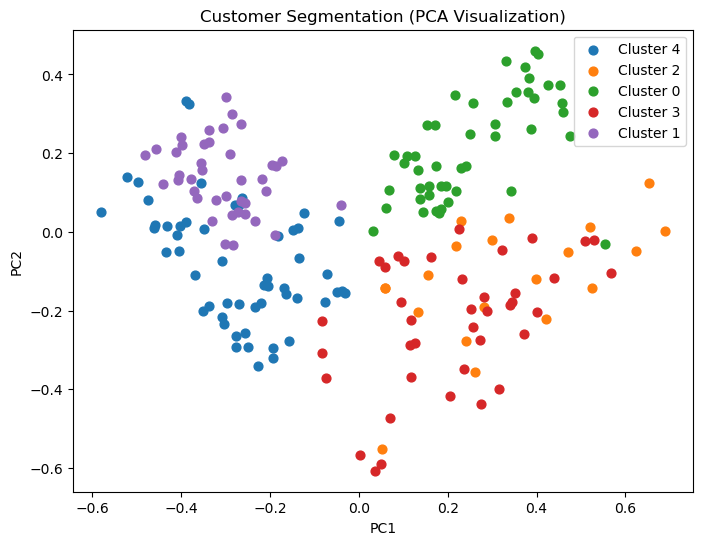

In [20]:
# =========================
# Identify Customer Segments Using Clustering
# =========================

# Apply KMeans with optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_  # Assign cluster labels

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PC1'] = pca_components[:,0]
df['PC2'] = pca_components[:,1]

# Plot clusters
plt.figure(figsize=(8,6))
for c in df['Cluster'].unique():
    subset = df[df['Cluster'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {c}', s=40)

plt.title('Customer Segmentation (PCA Visualization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Customer Segmentation Results

After applying clustering techniques, **customers were grouped into distinct
segments based on age, income, and spending behavior**. These segments reveal
clear **behavioral differences** that can inform targeted business strategies.

## Segment Profiles and Interpretation

Each cluster represents a distinct customer segment with characteristic
spending and engagement patterns:

- **Cluster 0**: Older customers with moderate income and moderate spending  
- **Cluster 1**: Young, high-income, high-spending customers  
- **Cluster 2**: Young, low-income but high-spending customers  
- **Cluster 3**: Average age, average income, moderate spending  
- **Cluster 4**: Older, high-income, low-spending customers  

These profiles form the foundation for targeted marketing and pricing strategies.

## Business Recommendations & Key Takeaways

---

This segmentation analysis highlights that customers with similar income levels
can exhibit very different spending behaviors, reinforcing the need for
behavior-driven rather than demographic-only strategies.

Key recommendations include:
- Prioritize premium offerings and loyalty programs for high-income,
  high-spending customers.
- Use targeted engagement campaigns to activate high-income but low-spending
  segments.
- Design value-oriented bundles for lower-income customers who show strong
  spending intent.
- Avoid one-size-fits-all strategies; segmentation enables differentiated action
  with minimal operational complexity.

Overall, this project demonstrates how unsupervised learning can be used to
translate raw customer data into **clear, actionable business strategies**.

## Appendix: Technical Details

The following sections contain technical implementation details used to support
the analysis, including clustering evaluation metrics, alternative algorithms,
and dimensionality reduction techniques.

These details are included for transparency and technical completeness, but the
primary focus of this project is on **business interpretation and actionable
customer segmentation**.

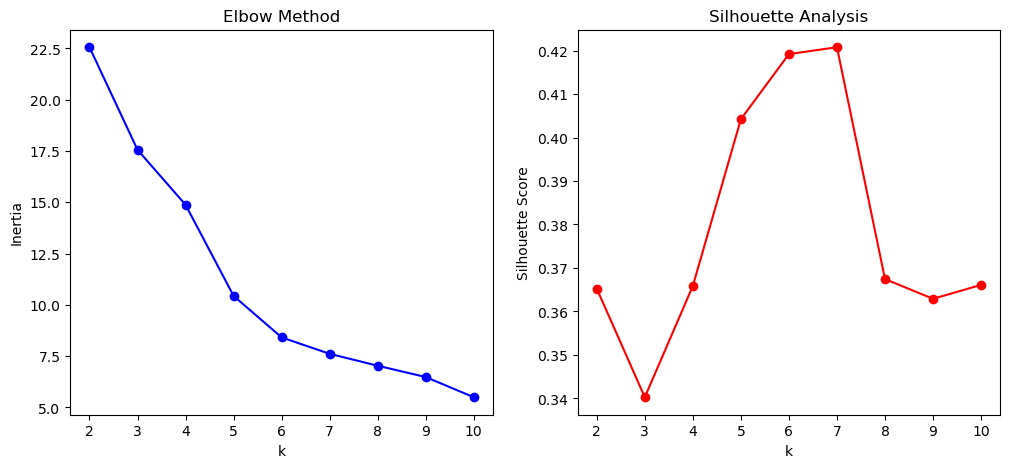

In [19]:
# =========================
# Appendix A: Feature Scaling and Cluster Selection Methods
# =========================

# Selecting Features for Segmentation

# Select numeric features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features to 0-1 range for KMeans and other clustering
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method and Silhouette Score
inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

KMeans Silhouette Score: 0.40421034059490324
KMeans Davies-Bouldin Index: 0.9387275275763756
KMeans Calinski-Harabasz Score: 125.93103938550396
Agglomerative Silhouette: 0.3955454334726548
Agglomerative DBI: 0.8746143334035464
Agglomerative CH: 123.99070840826577
GMM Silhouette: 0.3940540978840145
GMM DBI: 1.001811432914082
GMM CH: 115.80406350452684


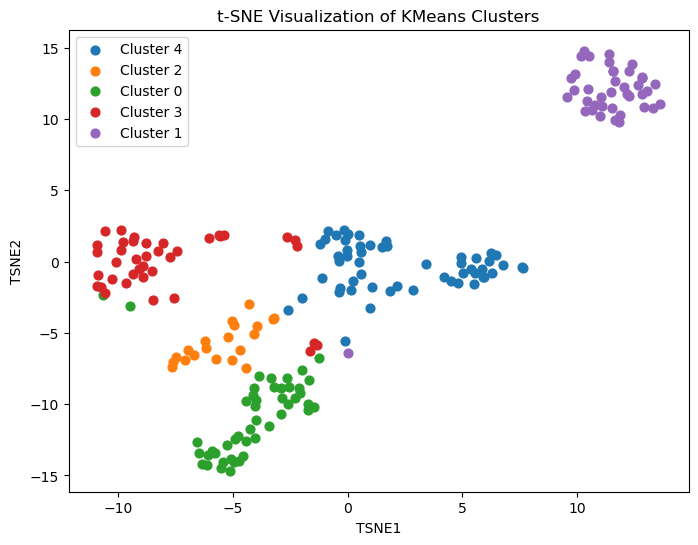

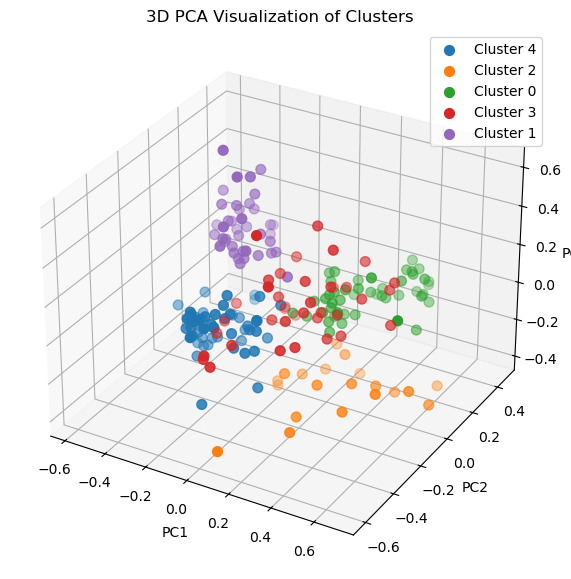

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.042553,54.617021,48.234043
1,32.875000,86.100000,81.525000
2,46.250000,26.750000,18.350000
3,39.384615,85.820513,20.102564
4,25.185185,41.092593,62.240741


In [18]:
# =========================
# Appendix B: Alternative Clustering Methods and Validation Metrics
# =========================

# Evaluate KMeans clusters using multiple metrics
sil = silhouette_score(X_scaled, df['Cluster'])
dbi = davies_bouldin_score(X_scaled, df['Cluster'])
ch = calinski_harabasz_score(X_scaled, df['Cluster'])

print("KMeans Silhouette Score:", sil)
print("KMeans Davies-Bouldin Index:", dbi)
print("KMeans Calinski-Harabasz Score:", ch)

# Apply Agglomerative Clustering for comparison
agg = AgglomerativeClustering(n_clusters=5)
df['AggCluster'] = agg.fit_predict(X_scaled)

# Evaluate Agglomerative
print("Agglomerative Silhouette:", silhouette_score(X_scaled, df['AggCluster']))
print("Agglomerative DBI:", davies_bouldin_score(X_scaled, df['AggCluster']))
print("Agglomerative CH:", calinski_harabasz_score(X_scaled, df['AggCluster']))

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMMCluster'] = gmm.fit_predict(X_scaled)

# Evaluate GMM
print("GMM Silhouette:", silhouette_score(X_scaled, df['GMMCluster']))
print("GMM DBI:", davies_bouldin_score(X_scaled, df['GMMCluster']))
print("GMM CH:", calinski_harabasz_score(X_scaled, df['GMMCluster']))

# t-SNE for visualizing KMeans clusters in 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)
df['TSNE1'] = tsne_results[:,0]
df['TSNE2'] = tsne_results[:,1]

plt.figure(figsize=(8,6))
for c in df['Cluster'].unique():
    subset = df[df['Cluster']==c]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {c}', s=40)

plt.title("t-SNE Visualization of KMeans Clusters")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend()
plt.show()

# 3D PCA plot for KMeans clusters
pca_3d = PCA(n_components=3)
pca_3d_results = pca_3d.fit_transform(X_scaled)
df['PC1_3D'] = pca_3d_results[:,0]
df['PC2_3D'] = pca_3d_results[:,1]
df['PC3_3D'] = pca_3d_results[:,2]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for c in df['Cluster'].unique():
    subset = df[df['Cluster']==c]
    ax.scatter(subset['PC1_3D'], subset['PC2_3D'], subset['PC3_3D'], label=f'Cluster {c}', s=50)

ax.set_title("3D PCA Visualization of Clusters")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()

# Compare all clustering algorithms
comparison = pd.DataFrame({
    'Algorithm': ['KMeans','Agglomerative','GMM'],
    'Silhouette': [
        silhouette_score(X_scaled, df['Cluster']),
        silhouette_score(X_scaled, df['AggCluster']),
        silhouette_score(X_scaled, df['GMMCluster'])
    ],
    'Davies-Bouldin': [
        davies_bouldin_score(X_scaled, df['Cluster']),
        davies_bouldin_score(X_scaled, df['AggCluster']),
        davies_bouldin_score(X_scaled, df['GMMCluster'])
    ],
    'Calinski-Harabasz': [
        calinski_harabasz_score(X_scaled, df['Cluster']),
        calinski_harabasz_score(X_scaled, df['AggCluster']),
        calinski_harabasz_score(X_scaled, df['GMMCluster'])
    ]
})
comparison

# Profile each KMeans cluster to understand characteristics
cluster_profile = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_profile